# <center> <img src="../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> **Big Data** </center>
---
### <center> **Autumn 2025** </center>
---
### <center> **Parse Log Files to Extract Timestamps** </center>
---
**Profesor**: Pablo Camarillo Ramirez
**Alumno**: Aura Melina Gutierrez Jimenez

# Find the PySpark Installation

In [1]:
import findspark
findspark.init()

# Create SparkSession

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Examples on Map Reduce") \
    .master("spark://b1ca502cde8a:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/09 14:36:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Example: Parse Log Files to Extract Timestamps
## Create the RDD

In [7]:
logs = [
    "2023-10-01 12:00:00 INFO: System started",
    "2023-10-01 12:05:00 ERROR: Disk full",
    "2023-10-01 12:10:00 INFO: Backup completed",
    "2023-10-01 12:00:00 INFO: System started",
    "2023-10-01 12:05:00 ERROR: Disk full",
    "2023-10-01 12:10:00 INFO: Backup completed",
    "2023-10-01 12:15:00 WARN: Low memory"]
rdd = sc.parallelize(logs)

## Map Phase

In [8]:
timestamps_rdd = rdd.map(lambda log: log.split(' ')[1])

## Collect results

In [9]:
timestamps_rdd.collect()

['12:00:00',
 '12:05:00',
 '12:10:00',
 '12:00:00',
 '12:05:00',
 '12:10:00',
 '12:15:00']

## DAG Visualization

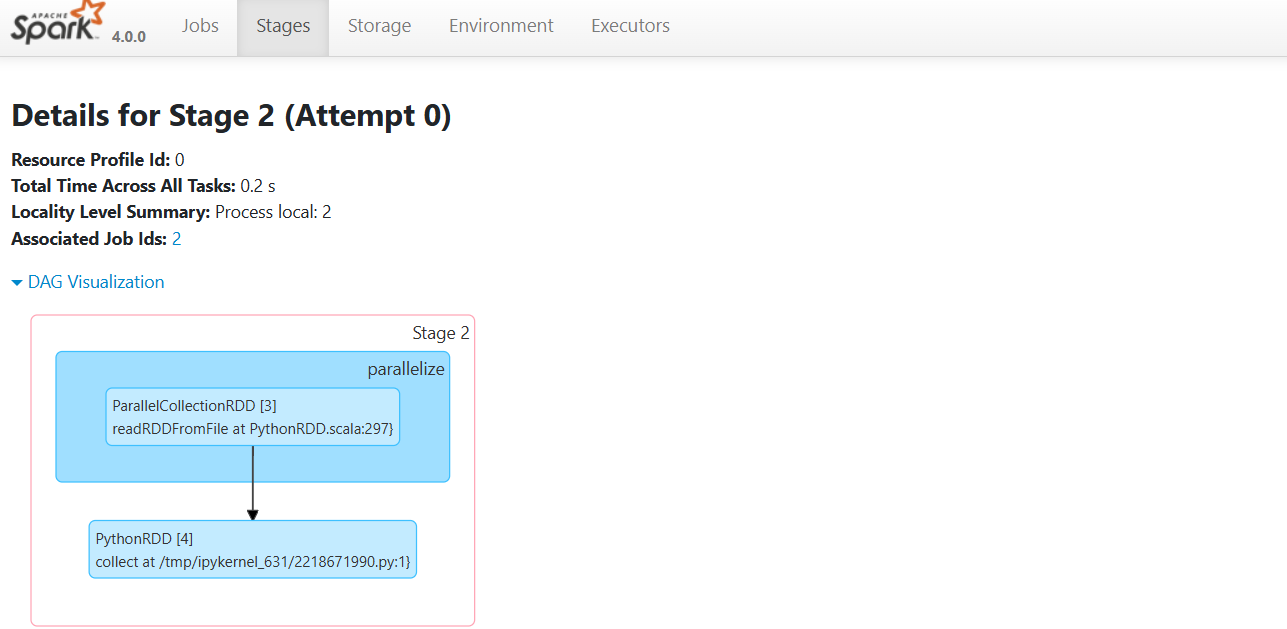

# Close SparkContext

In [14]:
sc.stop()